In [81]:
import pandas as pd

KMI data (aws_10min) is loaded. Timestamp is converted to Pandas datetime column. Only data of 2022 of the automatic weather station at coordinates 3.202-51.348 is selected.

In [82]:
#load kmi data
dfkmi = pd.read_csv("E:\MDA 2023\\aws_10min.csv")
dfkmi['timestamp'] = dfkmi['timestamp'].replace('T', ' ', regex=True)
dfkmi['timestamp'] = pd.to_datetime(dfkmi['timestamp'],format='%Y-%m-%d %H:%M:%S')
# Extract and select year 2022, 1 station
dfkmi['year'] = dfkmi['timestamp'].dt.year.astype('int64')
dfkmi = dfkmi[dfkmi['year']==2022]
dfkmi = dfkmi[dfkmi['the_geom']=='POINT (3.202 51.348)']

In [83]:
dfkmi = dfkmi.drop(['FID','the_geom','qc_flags','year','code'],axis=1)
dfkmi

,timestamp,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction
1643,2022-09-18 05:10:00,1016.34,14.89,59.20,0.00,7.43,291.9
5679,2022-09-22 03:40:00,1021.76,12.58,73.37,0.00,2.45,162.2
5681,2022-09-23 03:50:00,1014.66,13.67,72.37,0.00,3.18,189.3
5683,2022-09-23 12:40:00,1014.06,18.18,70.19,0.00,4.33,236.9
5685,2022-09-23 15:40:00,1013.00,16.17,81.21,0.23,5.16,215.9
...,...,...,...,...,...,...,...
555950,2022-09-18 04:30:00,1016.36,14.89,60.61,0.00,5.92,291.0
557984,2022-09-18 05:30:00,1016.39,14.78,59.21,0.00,6.19,291.4
562001,2022-09-18 04:40:00,1016.36,14.88,60.06,0.00,6.05,283.8
566035,2022-09-18 04:50:00,1016.34,14.87,60.45,0.00,7.00,293.3


In [84]:
dfkmi = dfkmi.sort_values(by=['timestamp'])
dfkmi

,timestamp,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction
111736,2022-01-01 00:00:00,1021.77,10.59,92.84,0.0,4.06,191.3
112569,2022-01-01 00:10:00,1021.82,10.88,93.00,0.0,4.14,193.4
191162,2022-01-01 00:20:00,1021.87,10.82,93.06,0.0,4.67,188.2
111200,2022-01-01 00:30:00,1021.76,11.03,93.31,0.0,5.00,189.8
191164,2022-01-01 00:40:00,1021.75,11.34,93.26,0.0,5.54,191.7
...,...,...,...,...,...,...,...
75091,2022-12-31 23:10:00,1004.94,13.92,69.09,0.0,12.41,200.2
75093,2022-12-31 23:20:00,1005.10,13.76,68.79,0.0,11.94,201.6
75095,2022-12-31 23:30:00,1005.26,13.61,69.26,0.0,12.81,204.6
75097,2022-12-31 23:40:00,1005.22,13.49,69.54,0.0,11.92,203.7


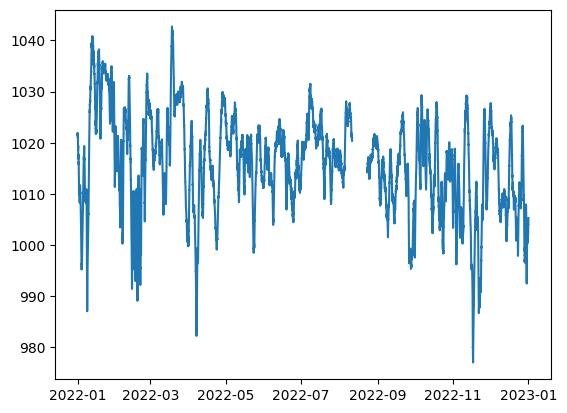

In [85]:
plt.plot(dfkmi['timestamp'],dfkmi['air_pressure'])

In [86]:
dfkmi['result_timestamp'] = dfkmi['timestamp']
dfkmi = dfkmi.drop(['timestamp'],axis=1)
dfkmi

,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction,result_timestamp
111736,1021.77,10.59,92.84,0.0,4.06,191.3,2022-01-01 00:00:00
112569,1021.82,10.88,93.00,0.0,4.14,193.4,2022-01-01 00:10:00
191162,1021.87,10.82,93.06,0.0,4.67,188.2,2022-01-01 00:20:00
111200,1021.76,11.03,93.31,0.0,5.00,189.8,2022-01-01 00:30:00
191164,1021.75,11.34,93.26,0.0,5.54,191.7,2022-01-01 00:40:00
...,...,...,...,...,...,...,...
75091,1004.94,13.92,69.09,0.0,12.41,200.2,2022-12-31 23:10:00
75093,1005.10,13.76,68.79,0.0,11.94,201.6,2022-12-31 23:20:00
75095,1005.26,13.61,69.26,0.0,12.81,204.6,2022-12-31 23:30:00
75097,1005.22,13.49,69.54,0.0,11.92,203.7,2022-12-31 23:40:00


KMI data is shifted forward by 24 hours, so the target (noise) value of day X will be predicted with the weather data on day X-1.

In [87]:
dfkmi['result_timestamp'] = dfkmi['result_timestamp']+pd.DateOffset(days=1)

Dataframe from MDA_merge_data.ipynb is loaded. 'result_timestamp' is converted to Pandas datetime column to enable merge with KMI data.

In [88]:
df = pd.read_csv("C:\\Users\Arthur\hello\MDA_dataframeArthur.csv")
df

,result_timestamp,laeq,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,2022-01-02 00:10:00,40.954667,0,6,2,1,1,91.0,11.88,38.0,0.0,0.000,0.000,-48.0,0.04,0.0,13.28,13.28,13.223,13.23639
1,2022-01-02 00:20:00,37.623667,0,6,2,1,1,90.0,11.72,37.0,0.0,0.000,0.000,45.0,0.02,0.0,13.28,13.28,13.223,13.16699
2,2022-01-02 00:30:00,36.445333,0,6,2,1,1,90.0,11.72,38.0,0.0,0.000,0.000,-52.0,0.04,0.0,13.28,13.28,13.223,13.19886
3,2022-01-02 00:40:00,38.298000,0,6,2,1,1,90.0,11.72,37.0,0.0,0.000,0.000,34.0,0.02,0.0,13.28,13.28,13.223,13.16699
4,2022-01-02 00:50:00,39.350417,0,6,2,1,1,90.0,11.72,38.0,0.0,0.000,0.000,0.0,0.00,0.0,13.28,13.28,13.223,13.09212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52266,2022-12-31 23:10:00,52.203333,23,5,31,12,1,94.0,12.63,38.0,0.0,0.000,0.007,28.0,0.09,0.0,13.51,13.51,13.453,13.48489
52267,2022-12-31 23:20:00,54.622833,23,5,31,12,1,94.0,12.61,37.0,0.0,0.000,0.000,72.0,0.03,0.0,13.50,13.50,13.443,13.40492
52268,2022-12-31 23:30:00,56.135667,23,5,31,12,1,94.0,12.67,38.0,0.0,0.000,0.000,63.0,0.04,0.0,13.56,13.56,13.503,13.47255
52269,2022-12-31 23:40:00,59.380333,23,5,31,12,1,94.0,12.73,37.0,0.0,0.003,0.000,34.0,0.14,0.0,13.61,13.61,13.553,13.60671


In [89]:
df['result_timestamp'] = pd.to_datetime(df['result_timestamp'], format="%Y-%m-%d %H:%M:%S")
df

,result_timestamp,laeq,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,2022-01-02 00:10:00,40.954667,0,6,2,1,1,91.0,11.88,38.0,0.0,0.000,0.000,-48.0,0.04,0.0,13.28,13.28,13.223,13.23639
1,2022-01-02 00:20:00,37.623667,0,6,2,1,1,90.0,11.72,37.0,0.0,0.000,0.000,45.0,0.02,0.0,13.28,13.28,13.223,13.16699
2,2022-01-02 00:30:00,36.445333,0,6,2,1,1,90.0,11.72,38.0,0.0,0.000,0.000,-52.0,0.04,0.0,13.28,13.28,13.223,13.19886
3,2022-01-02 00:40:00,38.298000,0,6,2,1,1,90.0,11.72,37.0,0.0,0.000,0.000,34.0,0.02,0.0,13.28,13.28,13.223,13.16699
4,2022-01-02 00:50:00,39.350417,0,6,2,1,1,90.0,11.72,38.0,0.0,0.000,0.000,0.0,0.00,0.0,13.28,13.28,13.223,13.09212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52266,2022-12-31 23:10:00,52.203333,23,5,31,12,1,94.0,12.63,38.0,0.0,0.000,0.007,28.0,0.09,0.0,13.51,13.51,13.453,13.48489
52267,2022-12-31 23:20:00,54.622833,23,5,31,12,1,94.0,12.61,37.0,0.0,0.000,0.000,72.0,0.03,0.0,13.50,13.50,13.443,13.40492
52268,2022-12-31 23:30:00,56.135667,23,5,31,12,1,94.0,12.67,38.0,0.0,0.000,0.000,63.0,0.04,0.0,13.56,13.56,13.503,13.47255
52269,2022-12-31 23:40:00,59.380333,23,5,31,12,1,94.0,12.73,37.0,0.0,0.003,0.000,34.0,0.14,0.0,13.61,13.61,13.553,13.60671


KMI data is merged with MDA_dataframeArthur to form MDA_dataframeArthurKMI (temporarily named df_merged)

In [90]:
df_merged = pd.merge(df,dfkmi,on='result_timestamp', validate="1:1")

In [91]:
# check for missings
df_merged.isnull().sum()

result_timestamp       0
laeq                   0
hour                   0
day                    0
day_of_month           0
month                  0
weekend                0
LC_HUMIDITY            0
LC_DWPTEMP             0
LC_n                   0
LC_RAD                 0
LC_RAININ              0
LC_DAILYRAIN           0
LC_WINDDIR             0
LC_WINDSPEED           0
LC_RAD60               0
LC_TEMP_QCL0           0
LC_TEMP_QCL1           0
LC_TEMP_QCL2           0
LC_TEMP_QCL3           0
air_pressure          53
air_temperature       54
relative_humidity     54
precipitation          1
wind_speed           346
wind_direction       346
dtype: int64

In [92]:
# only keep rows without missings
df_merged = df_merged[df_merged.isnull()['wind_speed']==False]

In [93]:
#doublecheck whether missings are gone
df_merged.isnull().sum()

result_timestamp     0
laeq                 0
hour                 0
day                  0
day_of_month         0
month                0
weekend              0
LC_HUMIDITY          0
LC_DWPTEMP           0
LC_n                 0
LC_RAD               0
LC_RAININ            0
LC_DAILYRAIN         0
LC_WINDDIR           0
LC_WINDSPEED         0
LC_RAD60             0
LC_TEMP_QCL0         0
LC_TEMP_QCL1         0
LC_TEMP_QCL2         0
LC_TEMP_QCL3         0
air_pressure         0
air_temperature      0
relative_humidity    0
precipitation        0
wind_speed           0
wind_direction       0
dtype: int64

'result_timestamp' is converted to string, because exporting datetime column to csv and importing again gives problems.

In [94]:
df_merged['result_timestamp'] = df_merged['result_timestamp'].astype(str)

Dataframe is visualized for final check.

In [97]:
df_merged

,result_timestamp,laeq,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,...,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction
0,2022-01-02 00:10:00,40.954667,0,6,2,1,1,91.0,11.88,38.0,...,13.28,13.28,13.223,13.23639,1021.82,10.88,93.00,0.00,4.14,193.4
1,2022-01-02 00:20:00,37.623667,0,6,2,1,1,90.0,11.72,37.0,...,13.28,13.28,13.223,13.16699,1021.87,10.82,93.06,0.00,4.67,188.2
2,2022-01-02 00:30:00,36.445333,0,6,2,1,1,90.0,11.72,38.0,...,13.28,13.28,13.223,13.19886,1021.76,11.03,93.31,0.00,5.00,189.8
3,2022-01-02 00:40:00,38.298000,0,6,2,1,1,90.0,11.72,37.0,...,13.28,13.28,13.223,13.16699,1021.75,11.34,93.26,0.00,5.54,191.7
4,2022-01-02 00:50:00,39.350417,0,6,2,1,1,90.0,11.72,38.0,...,13.28,13.28,13.223,13.09212,1021.88,11.94,93.36,0.00,5.70,197.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50583,2022-12-31 23:10:00,52.203333,23,5,31,12,1,94.0,12.63,38.0,...,13.51,13.51,13.453,13.48489,1000.84,12.39,93.02,0.68,7.89,225.4
50584,2022-12-31 23:20:00,54.622833,23,5,31,12,1,94.0,12.61,37.0,...,13.50,13.50,13.443,13.40492,1000.78,12.19,92.86,0.07,7.70,211.1
50585,2022-12-31 23:30:00,56.135667,23,5,31,12,1,94.0,12.67,38.0,...,13.56,13.56,13.503,13.47255,1000.76,12.01,92.95,0.00,7.51,209.1
50586,2022-12-31 23:40:00,59.380333,23,5,31,12,1,94.0,12.73,37.0,...,13.61,13.61,13.553,13.60671,1000.97,12.02,93.09,0.14,6.78,212.3


Dataframe is exported as csv file.

In [98]:
df_merged.to_csv('MDA_dataframeArthurKMI.csv',index=False)